In [30]:
import os
import pandas as pd
import numpy as np

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
os.chdir('/content/drive/MyDrive/PDS_Assignment_3_and_4/')

In [33]:
data = pd.read_csv('Ques_2/data_raw/raw_data.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [36]:
#Task-a

# Setting the seed
np.random.seed(550)


# Taking a random sample of 25 observations
sample_Observations = data.sample(n=25)


# Calculating the mean of the sample and population
sample_mean = sample_Observations['Glucose'].mean()
sample_max = sample_Observations['Glucose'].max()

population_mean = data['Glucose'].mean()
population_max = data['Glucose'].max()


#Printing the mean, max values of samples and population
print('Sample Mean Glucose:', sample_mean)
print('Sample Max Glucose:', sample_max)

print('Population Mean Glucose:', population_mean)
print('Population Max Glucose:', population_max)

Sample Mean Glucose: 125.12
Sample Max Glucose: 189
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


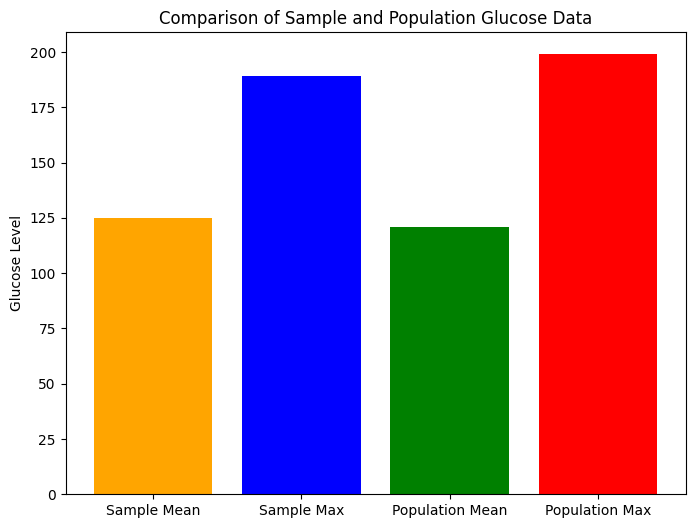

In [37]:
# Plotting the graph for the above data
import matplotlib.pyplot as plt

categories = ['Sample Mean', 'Sample Max', 'Population Mean', 'Population Max']
values = [sample_mean, sample_max, population_mean, population_max]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['orange', 'blue', 'green', 'red'])
plt.title('Comparison of Sample and Population Glucose Data')
plt.ylabel('Glucose Level')
plt.savefig('Ques_2/results/task_a.png')
plt.show()

In [38]:
#Task-b

#Calculating BMI for sample observations and the population
sample_Observations_bmi_98 = np.percentile(sample_Observations['BMI'], 98)
population_bmi_98 = np.percentile(data['BMI'], 98)

print('98th Percentile BMI for the sample observations:', sample_Observations_bmi_98)
print('98th Percentile BMI for the population:' , population_bmi_98)

98th Percentile BMI for the sample observations: 46.512
98th Percentile BMI for the population: 47.52599999999996


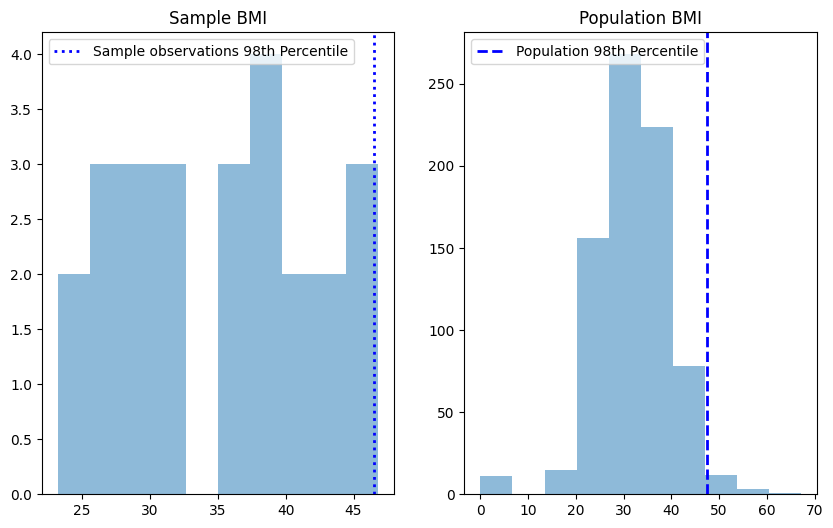

In [39]:
#Plotting the graph for the above data

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Sample BMI')
plt.hist(sample_Observations['BMI'], bins=10, alpha=0.5)
plt.axvline(sample_Observations_bmi_98, color='blue', linestyle='dotted', linewidth=2, label='Sample observations 98th Percentile')
plt.legend()
plt.subplot(1,2,2)
plt.title('Population BMI')
plt.hist(data['BMI'], bins=10, alpha=0.5)
plt.axvline(population_bmi_98, color='blue', linestyle='dashed', linewidth=2, label='Population 98th Percentile')
plt.savefig('Ques_2/results/task_b.png')
plt.legend()
plt.show()

In [40]:
#Task-c

# Creating 500 bootstrap samples with 150 observations each

sample_size = 500

bootstr_samples = []
for i in range(sample_size):
    bootstr_sample = data.sample(150, replace=True)
    bootstr_samples.append(bootstr_sample)

# Calculating the mean, SD , and percentile for BP variable of the bootstrapped samples
bootstr_mean = []
bootstr_std_dev = []
bootstr_percentile = []
for sample in bootstr_samples:
    bootstr_mean.append(sample["BloodPressure"].mean())
    bootstr_std_dev.append(sample["BloodPressure"].std())
    bootstr_percentile.append(sample["BloodPressure"].quantile(0.98))

# Calculating the mean, SD, and percentile for BP variable of the population
population_mean_bp = data["BloodPressure"].mean()
population_sd_bp = data["BloodPressure"].std()
population_98th_percentile_bp = data["BloodPressure"].quantile(0.98)


print("population_mean_blood_pressure:",population_mean_bp)
print("population_std_dev_blood_pressure:",population_sd_bp)
print("population_98th_percentile_blood_pressure:",population_98th_percentile_bp)


population_mean_blood_pressure: 69.10546875
population_std_dev_blood_pressure: 19.355807170644777
population_98th_percentile_blood_pressure: 99.31999999999994


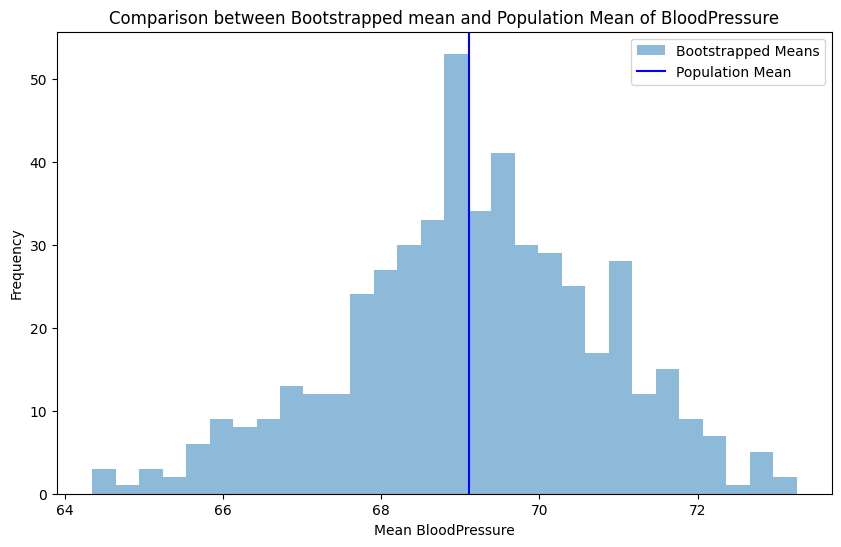

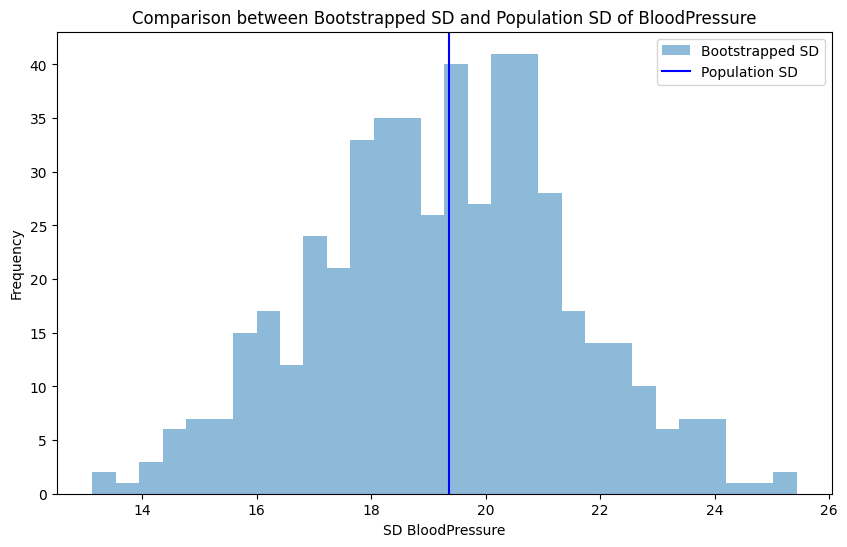

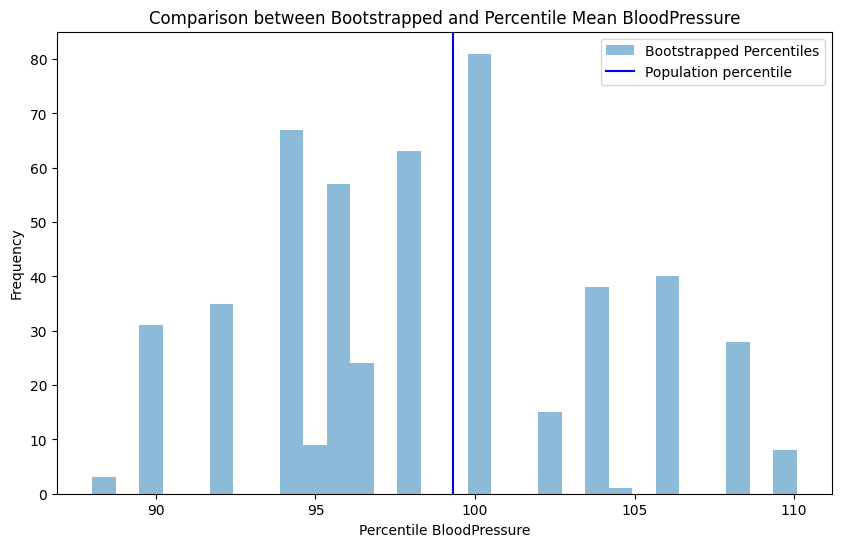

In [41]:
# Creating charts to compare different statistical measures

#Bootstrapped means vs Population mean for the Blood pressure
plt.figure(figsize=(10, 6))
plt.hist(bootstr_mean, bins=30, alpha=0.5, label="Bootstrapped Means")
plt.axvline(population_mean_bp, color="blue", label="Population Mean")
plt.title("Comparison between Bootstrapped mean and Population Mean of BloodPressure")
plt.xlabel("Mean BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Ques_2/results/task_c_1.png')
plt.show()

# Bootstrapped Standard deviation vs Population standard deviation for the Blood Pressure
plt.figure(figsize=(10,6))
plt.hist(bootstr_std_dev, bins=30, alpha=0.5, label="Bootstrapped SD")
plt.axvline(population_sd_bp, color="blue", label="Population SD")
plt.title("Comparison between Bootstrapped SD and Population SD of BloodPressure")
plt.xlabel("SD BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Ques_2/results/task_c_2.png')
plt.show()


# Bootstrapped Percentile vs Population percentile for the Blood Pressure
plt.figure(figsize=(10,6))
plt.hist(bootstr_percentile, bins=30, alpha=0.5, label="Bootstrapped Percentiles")
plt.axvline(population_98th_percentile_bp, color="blue", label="Population percentile")
plt.title("Comparison between Bootstrapped and Percentile Mean BloodPressure")
plt.xlabel("Percentile BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Ques_2/results/task_c_3.png')
plt.show()